# <center>PCA desde cero!

<center>


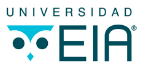


por:

**José Miguel Muñoz**<br>
**Esteban Vásquez**

Ya que expusimos la teoría fundamental sobre el funcionamiento matemático básico del PCA, podemos intentar hacer un módulo sencillo con fines ilustrativos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

In [2]:
class PCA:

  def __init__(self, datos, columnas, indices):
    self.datos=np.array(datos[columnas]).T
    self.columnas=columnas
    self.indices=indices
    self.df=datos.copy()
    self.dy=3.5
    self.autovalores=[]
    self.autovectores=[]


  def normaliza(self):
    print("*"*25);print("Las columnas iniciales y el número de observaciones");print("*"*25)
    for i in range(len(self.columnas)):
        print(i, self.columnas[i], len(self.datos[i,:]))
        self.datos[i,:] = (self.datos[i,:] - np.mean(self.datos[i,:]))/np.std(self.datos[i,:])
    return self.datos

  def eigen_vectores(self):
    cov = np.cov(self.datos) #Saca la matriz de covarianza (muli-paramétrica)
    self.autovalores, self.autovectores = np.linalg.eig(cov) #Calcula los auto valores y vectores
    self.orden_valores = np.argsort(self.autovalores)[::-1] # indices de los autovalores de mayor a menor
    print("*"*25);print("Los autovectores de cada observación son");print("*"*25)
    print(self.autovalores[self.orden_valores]) 

  def transformacion_lineal(self):    self.transformados = self.datos.T @ self.autovectores
    
  def ajustar(self):
    print("*"*25);print("Estoy ajustando los datos...");print("*"*25)
    self.datos=self.normaliza()
    self.eigen_vectores()
    self.transformacion_lineal()

  def graficarResultado(self,dx=4,dy=4,porc_nombres_pintar=1, nombres=True):
    plt.figure(figsize=(dx,dy))
    # Grafica los nombres
    if nombres==True:
     for i, name in enumerate(self.indices):
       if (i)%int(porc_nombres_pintar)==0:
        plt.text(0.5*dx*self.transformados[i,self.orden_valores[0]], 0.5*dx*self.transformados[i,self.orden_valores[1]], name, alpha=0.5*dx, fontsize=dx, color='Blue')
    else:
      for i, name in enumerate(self.indices):
        plt.scatter(0.5*dx*self.transformados[i,self.orden_valores[0]], 0.5*dx*self.transformados[i,self.orden_valores[1]], color='Blue')

    # Grafica los loading vectors
    for i, name in enumerate(self.columnas):
        plt.arrow(0, 0, dx*self.autovectores[i,self.orden_valores[0]], dx*self.autovectores[i, self.orden_valores[1]], head_width=0.1)
        plt.text(dx*self.autovectores[i,self.orden_valores[0]], dx*self.autovectores[i, self.orden_valores[1]], name, fontsize=14, color='Red')
    plt.xlabel('Primera Componente Principal');    plt.ylabel('Segunda Componente Principal')
    plt.xlim(-1.5*dx,1.5*dx);    plt.ylim(-1.5*dy,1.5*dy) #Poner los límites para la graficación
    plt.show()

  def graficaInteractiva(self,color="Puntaje",dx=4,dy=4,porc=1):

    loadings = self.autovectores.T * np.sqrt(self.autovalores)
    inversa=  self.autovectores.T @  self.datos
    fig = px.scatter(self.transformados, x=0 ,y=1, color=self.df[color],height=600,   width=600,)
    for i, feature in enumerate(self.df.columns[1:-1]):
     if i < len(loadings) and i%porc==0:
      fig.add_shape( type='line', x0=0, y0=0, x1=-loadings[i, 0],y1=loadings[i, 1]     )
      fig.add_annotation( x=-loadings[i, 0], y=loadings[i, 1], ax=0, ay=0,  xanchor="center",yanchor="bottom",text=feature )
    fig.show()

  def graficarIndiceExplicacion(self):
    print("Podrá ver el número de auto-valores suficientes para el análisis")
    plt.figure(figsize=(6,6))
    plt.plot(np.arange(len(self.columnas))+1, 100*np.cumsum(self.autovalores[self.orden_valores])/np.sum(self.autovalores))
    plt.scatter(np.arange(len(self.columnas))+1, 100*np.cumsum(self.autovalores[self.orden_valores])/np.sum(self.autovalores), s=100)
    plt.xlabel("Numero de autovalores")
    plt.ylabel("Porcentaje de Varianza explicada");    plt.ylim([0,110]) #Grafica toda la tasa de porcentaje
    plt.xticks(np.arange(len(self.columnas))+1)
    plt.grid();    plt.show()

## Ejemplo con nuestro caso de estudio

In [3]:
#Tomo las columnas numéricas
df=pd.read_excel("/content/0 DatosRiesgoCredito(I).xlsx")[['Edad', 'Estado civil', 'Hijos', 'Estrato', 'Nivel de estudios', 'Ingresos', 'Egresos', 'Califica', 'Puntaje']]
df[["Puntaje"]]=df[["Puntaje"]].dropna()
#Para solucionar el problema de las variables categoricas:
#Para el estado civil:
estado_civil={"Soltero":0,"Casado":1,"Unión Libre":2,"Separado":3,"Viudo": 11}
df[["Estado civil"]]=df[["Estado civil"]].replace(estado_civil)
#Para el nivel de estudios
estudios={"Bachiller":2,"Técnico": 3,"Profesional":5,"Tecnólogo":4,"Primaria":1,"Especializacion":6,"Ninguno": 0}
df[["Nivel de estudios"]]=df[["Nivel de estudios"]].replace(estudios)
#Veamos cómo quedó
df=df.reset_index().dropna()

In [4]:
df.head()

,index,Edad,Estado civil,Hijos,Estrato,Nivel de estudios,Ingresos,Egresos,Califica,Puntaje
0,0,22,0,0,2,3,949000,226000,1,27.0
1,1,57,1,2,4,2,1806000,1319000,1,63.0
3,3,23,0,0,2,3,583000,42000,1,17.0
4,4,22,0,0,2,3,750000,208000,1,20.0
5,5,58,0,0,3,2,781966,434000,1,48.0


*************************
Estoy ajustando los datos...
*************************
*************************
Las columnas iniciales y el número de observaciones
*************************
0 Edad 82
1 Estado civil 82
2 Hijos 82
3 Estrato 82
4 Nivel de estudios 82
5 Ingresos 82
6 Egresos 82
*************************
Los autovectores de cada observación son
*************************
[1.12766122 0.87984355 0.48252403 0.375446   0.23336018 0.15088655
 0.10333478]


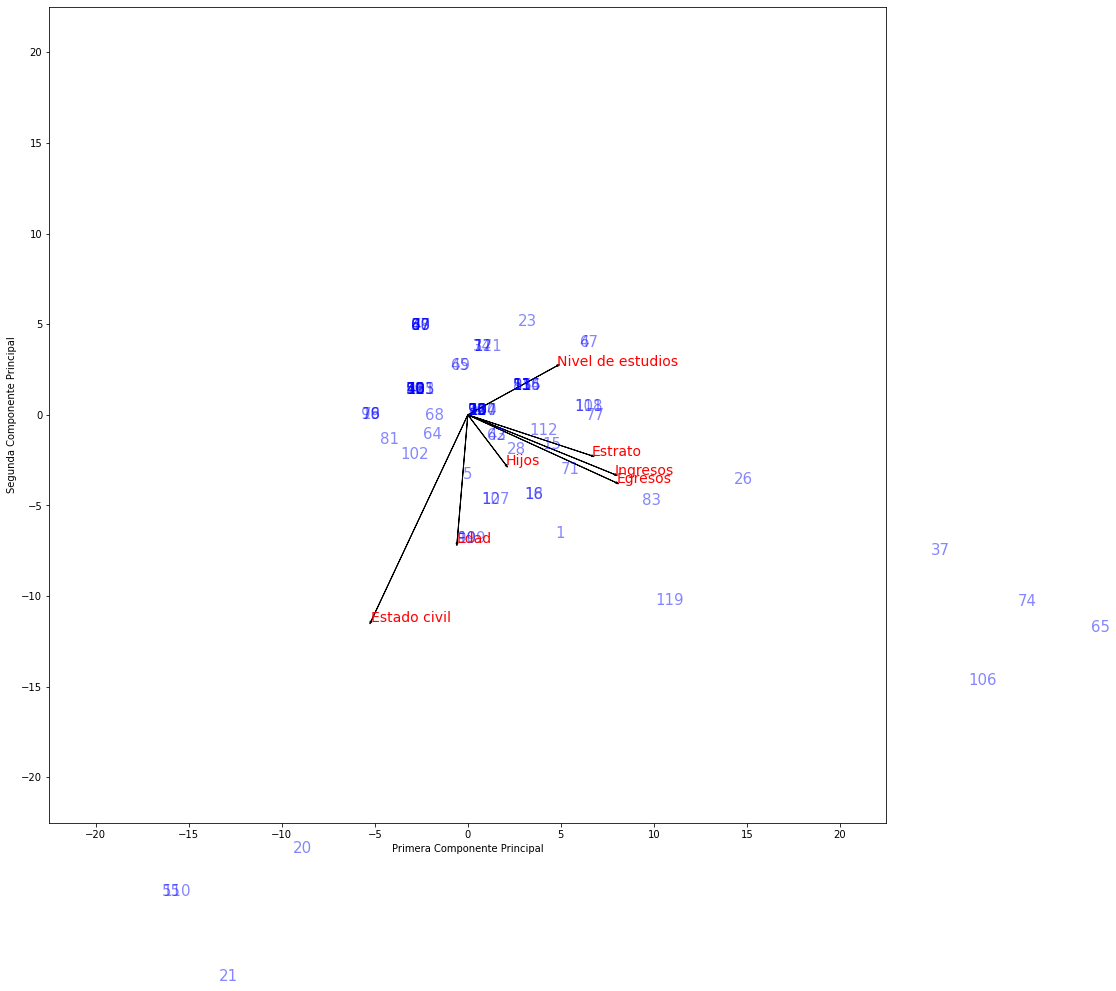

CPU times: user 655 ms, sys: 118 ms, total: 773 ms
Wall time: 733 ms


In [5]:
%%time
col_names =['Edad', 'Estado civil', 'Hijos', 'Estrato', 'Nivel de estudios', 'Ingresos', 'Egresos']
names = np.array(df['index'])
ejemplo_credito=PCA(df,col_names,names)
ejemplo_credito.ajustar()
ejemplo_credito.graficarResultado(15,15,1,nombres=True)

Podrá ver el número de auto-valores suficientes para el análisis


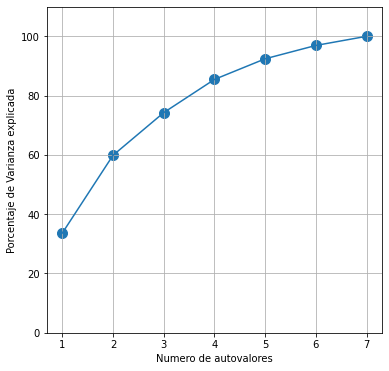

In [6]:
ejemplo_credito.graficarIndiceExplicacion()

In [7]:
ejemplo_credito.graficaInteractiva()

## Ejemplo con cualquier dataSet

*************************
Estoy ajustando los datos...
*************************
*************************
Las columnas iniciales y el número de observaciones
*************************
0 Murder 50
1 Assault 50
2 UrbanPop 50
3 Rape 50
*************************
Los autovectores de cada observación son
*************************
[2.53085875 1.00996444 0.36383998 0.17696948]


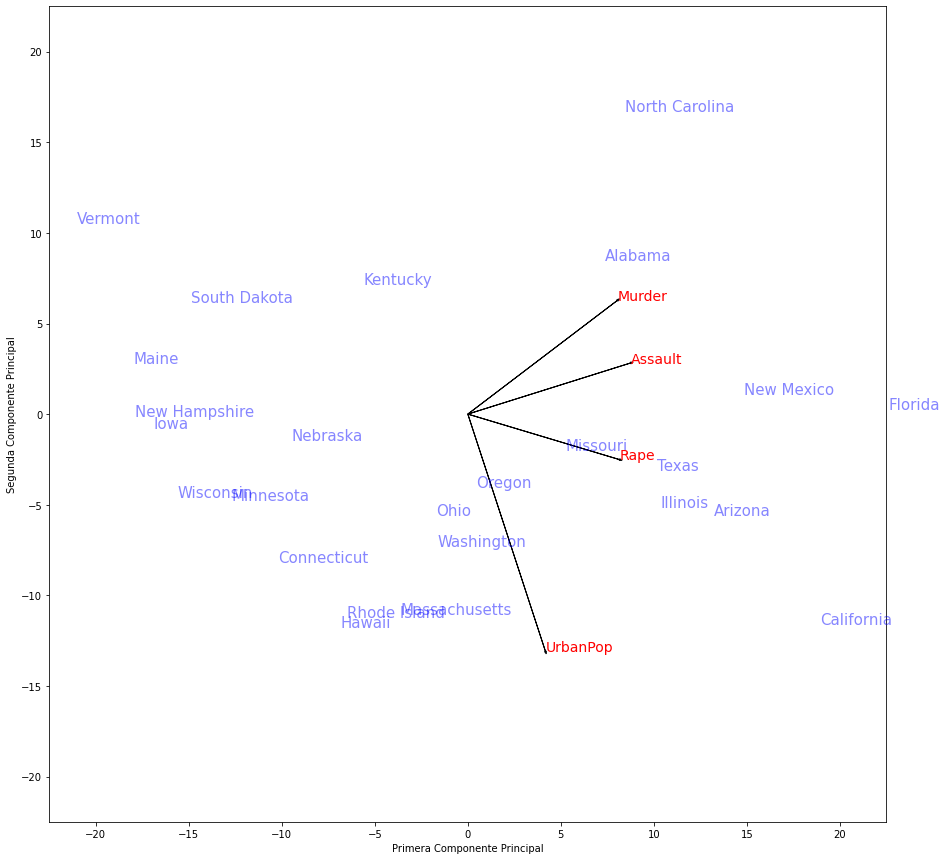

CPU times: user 349 ms, sys: 17.2 ms, total: 366 ms
Wall time: 364 ms


In [8]:
%%time
datos = pd.read_csv('/content/USArrests.csv')
col_names = ['Murder', 'Assault', 'UrbanPop', 'Rape']
names = np.array(datos['Unnamed: 0'])


ejemplo=PCA(datos,col_names,names)
ejemplo.ajustar()
ejemplo.graficarResultado(15,15,2,nombres=True)

Podrá ver el número de auto-valores suficientes para el análisis


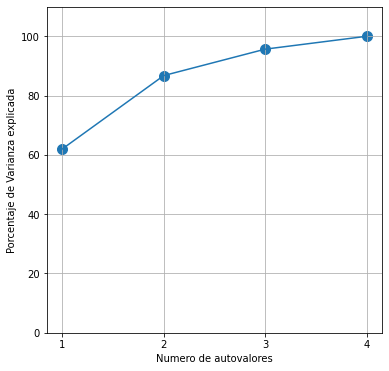

In [9]:
ejemplo.graficarIndiceExplicacion()

In [10]:
ejemplo.graficaInteractiva(color="Murder")